# Draw pictures according to records under ../model/

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
label = pd.read_csv('../dataset/cards.csv')
label

In [4]:
import numpy as np

In [ ]:
label = label.filepaths
label

In [ ]:
paths = np.random.choice(label, size=12, replace=False)

In [ ]:
paths[:] = '../dataset/' + paths[:]
paths

In [5]:
from PIL import Image

In [ ]:
fig = plt.figure(figsize=(5, 6), dpi=150)
for i, p in enumerate(paths):
    img = Image.open(p)
    ax = fig.add_subplot(4, 3, i + 1)
    ax.set_title(f'image{i}', fontsize=10)
    ax.imshow(img)
plt.tight_layout()
plt.savefig('../log_images/sample.jpg')
plt.show()

In [ ]:
label = pd.read_csv('../dataset/cards.csv')
label

In [ ]:
targets = pd.DataFrame(label.target.value_counts())

In [ ]:
for i, _ in targets.iterrows():
    l = label[label.target == i]['labels'].unique()[0]
    targets.loc[i, 'type'] = l

In [ ]:
targets

In [ ]:
list(targets['type'])

In [ ]:
plt.figure(figsize=(4, 6), dpi=150)
plt.title('The counts of different labels')
plt.xlabel('count')
plt.ylabel('label')
plt.yticks(range(len(targets)), labels=list(targets['type']))
plt.tick_params(labelsize=6, rotation=30)
plt.barh(range(len(targets)), targets.target, height=0.7, color=plt.get_cmap('hsv')(range(len(targets))))
plt.tight_layout()
plt.savefig('../logs/label_counts.jpg')
plt.show()

In [ ]:
lin_loss = pd.read_csv('../model/05-30_00-59/loss.csv')
lin_loss

In [ ]:
lin_acc = pd.read_csv('../model/05-30_00-59/acc.csv')
lin_acc

In [105]:
params = pd.read_csv('../model/05-30_00-59/params.csv')
params

,batch,epoch,lr,decay,seed
0,64,100,0.0001,0.0001,120


In [99]:
cnn_loss = pd.read_csv('../model/05-30_01-27/loss.csv')
cnn_acc = pd.read_csv('../model/05-30_01-27/acc.csv')
cnn_loss, cnn_acc

(    epoch     train     valid
 0       1  3.915637  3.880649
 1       2  3.852294  3.824206
 2       3  3.785651  3.772086
 3       4  3.721158  3.602312
 4       5  3.666419  3.664350
 ..    ...       ...       ...
 95     96  3.051345  3.305469
 96     97  3.050618  3.289441
 97     98  3.050147  3.322461
 98     99  3.050192  3.278327
 99    100  3.049604  3.330762
 
 [100 rows x 3 columns],
     epoch     train     valid
 0       1  0.082330  0.124528
 1       2  0.147391  0.188679
 2       3  0.212899  0.252830
 3       4  0.273678  0.320755
 4       5  0.324524  0.335849
 ..    ...       ...       ...
 95     96  0.950505  0.709434
 96     97  0.950834  0.713208
 97     98  0.951222  0.709434
 98     99  0.951827  0.720755
 99    100  0.952395  0.724528
 
 [100 rows x 3 columns])

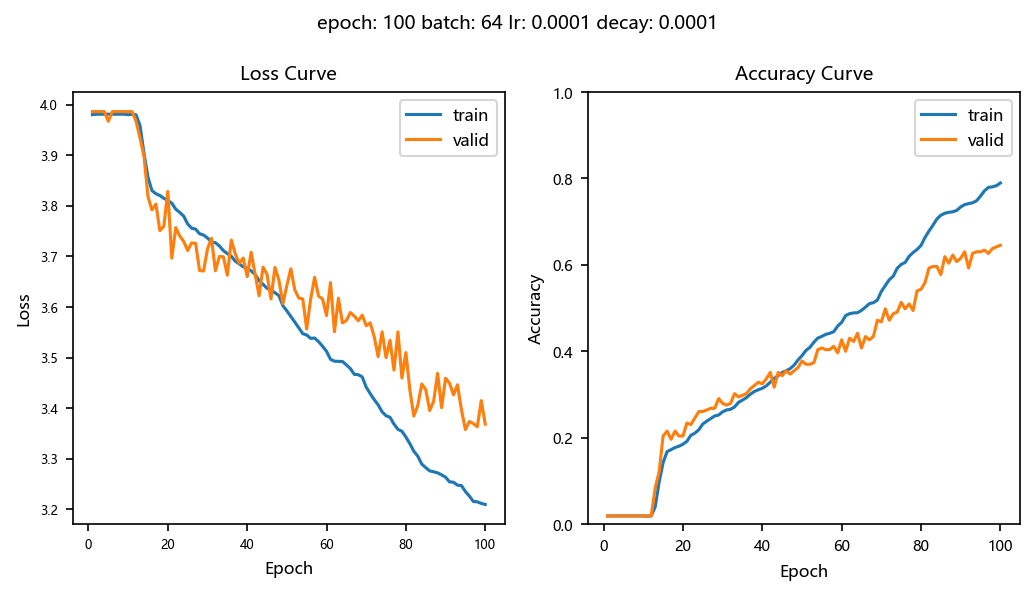

In [121]:
fig = plt.figure(figsize=(7, 4), dpi=150)
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel('Epoch', fontsize=8)
ax.set_ylabel('Loss', fontsize=8)
ax.set_title('Loss Curve', fontsize=9)
ax.plot(lin_loss['epoch'], lin_loss['train'], label='train')
ax.plot(lin_loss['epoch'], lin_loss['valid'], label='valid')
ax.tick_params(labelsize=6)
ax.legend(fontsize=8)

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_xlabel('Epoch', fontsize=8)
ax1.set_ylabel('Accuracy', fontsize=8)
ax1.set_title('Accuracy Curve', fontsize=9)
ax1.set_ylim(0, 1.0)
ax1.plot(lin_acc['epoch'], lin_acc['train'], label='train')
ax1.plot(lin_acc['epoch'], lin_acc['valid'], label='valid')
ax1.tick_params(labelsize=7)
ax1.legend(fontsize=8)

plt.suptitle(f'epoch: {params.epoch[0]} batch: {params.batch[0]} lr: {params.lr[0]} decay: {params.decay[0]}', fontsize=9)
plt.tight_layout()
plt.savefig('../log_images/lin_curve.jpg')
plt.show()

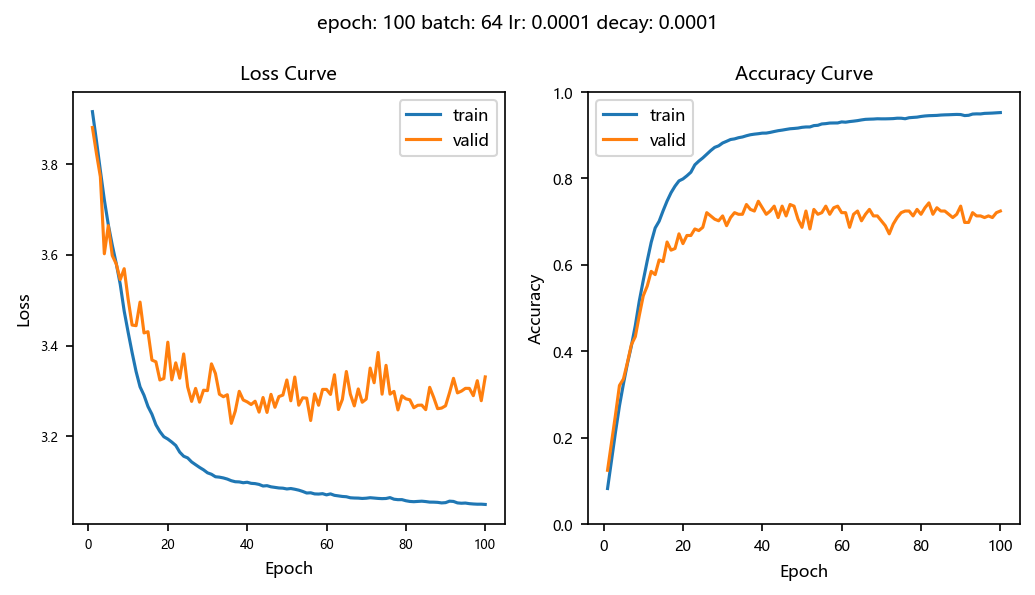

In [122]:
fig = plt.figure(figsize=(7, 4), dpi=150)
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel('Epoch', fontsize=8)
ax.set_ylabel('Loss', fontsize=8)
ax.set_title('Loss Curve', fontsize=9)
ax.plot(cnn_loss['epoch'], cnn_loss['train'], label='train')
ax.plot(cnn_loss['epoch'], cnn_loss['valid'], label='valid')
ax.tick_params(labelsize=6)
ax.legend(fontsize=8)

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_xlabel('Epoch', fontsize=8)
ax1.set_ylabel('Accuracy', fontsize=8)
ax1.set_title('Accuracy Curve', fontsize=9)
ax1.set_ylim(0, 1.0)
ax1.plot(cnn_acc['epoch'], cnn_acc['train'], label='train')
ax1.plot(cnn_acc['epoch'], cnn_acc['valid'], label='valid')
ax1.tick_params(labelsize=7)
ax1.legend(fontsize=8)

plt.suptitle(f'epoch: {params.epoch[0]} batch: {params.batch[0]} lr: {params.lr[0]} decay: {params.decay[0]}', fontsize=9)
plt.tight_layout()
plt.savefig('../log_images/cnn_curve.jpg')
plt.show()


In [9]:
loss = pd.read_csv('../model/05-30_02-00/loss.csv')
acc = pd.read_csv('../model/05-30_02-00/acc.csv')
f1 = pd.read_csv('../model/05-30_02-00/f1-score.csv')
params = pd.read_csv('../model/05-30_02-00/params.csv')
loss.shape, acc.shape, f1.shape, params.shape

((120, 3), (120, 3), (120, 3), (1, 5))

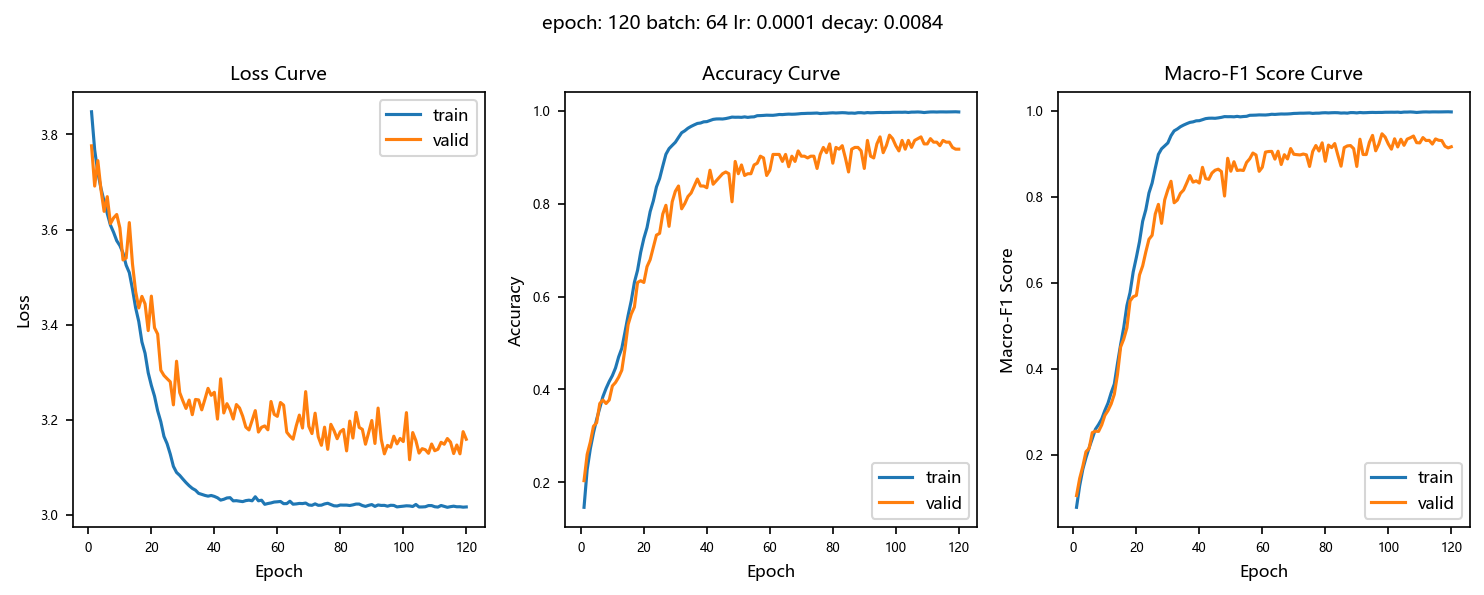

In [30]:
fig = plt.figure(figsize=(10, 4), dpi=150)
ax = fig.add_subplot(1, 3, 1)
ax.set_title('Loss Curve', fontsize=9)
ax.set_xlabel('Epoch', fontsize=8)
ax.set_ylabel('Loss', fontsize=8)
ax.plot(loss['epoch'], loss['train'], label='train')
ax.plot(loss['epoch'], loss['valid'], label='valid')
ax.tick_params(labelsize=6)
ax.legend(fontsize=8)

ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title('Accuracy Curve', fontsize=9)
ax1.set_xlabel('Epoch', fontsize=8)
ax1.set_ylabel('Accuracy', fontsize=8)
ax1.plot(acc['epoch'], acc['train'], label='train')
ax1.plot(acc['epoch'], acc['valid'], label='valid')
ax1.tick_params(labelsize=6)
ax1.legend(fontsize=8)

ax2 = fig.add_subplot(1, 3, 3)
ax2.set_title('Macro-F1 Score Curve', fontsize=9)
ax2.set_xlabel('Epoch', fontsize=8)
ax2.set_ylabel('Macro-F1 Score', fontsize=8)
ax2.plot(f1['epoch'], f1['train'], label='train')
ax2.plot(f1['epoch'], f1['valid'], label='valid')
ax2.tick_params(labelsize=6)
ax2.legend(fontsize=8)


plt.suptitle(f'epoch: {params.epoch[0]} batch: {params.batch[0]} lr: {params.lr[0]} decay: {params.decay[0]}', fontsize=9)
plt.tight_layout()
plt.savefig('../log_images/model_train_valid_curve.jpg')
plt.show()


In [13]:
acc

,epoch,train,valid
0,1,0.146474,0.203774
1,2,0.227804,0.260377
2,3,0.272532,0.286792
3,4,0.306658,0.320755
4,5,0.335448,0.328302
...,...,...,...
115,116,0.997038,0.932076
116,117,0.997155,0.932075
117,118,0.997284,0.920755
118,119,0.997429,0.916981


In [21]:
train_last_acc = acc.loc[110:120, 'train']
train_last_acc

110    0.997017
111    0.997105
112    0.996873
113    0.997149
114    0.997159
115    0.997038
116    0.997155
117    0.997284
118    0.997429
119    0.997073
Name: train, dtype: float64

In [26]:
valid_last_acc = acc.loc[110:120, 'valid']
valid_last_acc

110    0.939623
111    0.932076
112    0.932076
113    0.924528
114    0.935849
115    0.932076
116    0.932075
117    0.920755
118    0.916981
119    0.916981
Name: valid, dtype: float64

In [23]:
sum(train_last_acc) / len(train_last_acc)

0.9971283078193665

In [27]:
sum(valid_last_acc) / len(valid_last_acc)

0.9283019006252289

In [28]:
train_last_f1 = f1.loc[110:120, 'train']
valid_last_f1 = f1.loc[110:120, 'valid']
train_last_f1.shape, valid_last_f1.shape

((10,), (10,))

In [29]:
sum(train_last_f1) / len(train_last_f1), sum(valid_last_f1) / len(valid_last_f1)

(0.9971297919750214, 0.9263713538646698)

In [38]:
import pickle

In [66]:
with open('../model/05-30_02-00/test/curve.pkl', 'rb') as file:
    curve_dict = pickle.load(file)
curve_dict

{'confusion': array([[5, 0, 0, ..., 0, 0, 0],
        [0, 5, 0, ..., 0, 0, 0],
        [0, 0, 5, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 5, 0, 0],
        [0, 0, 1, ..., 0, 4, 0],
        [0, 0, 0, ..., 1, 0, 3]], dtype=int64)}

In [68]:
mat = curve_dict['confusion']
mat

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 1, ..., 0, 4, 0],
       [0, 0, 0, ..., 1, 0, 3]], dtype=int64)

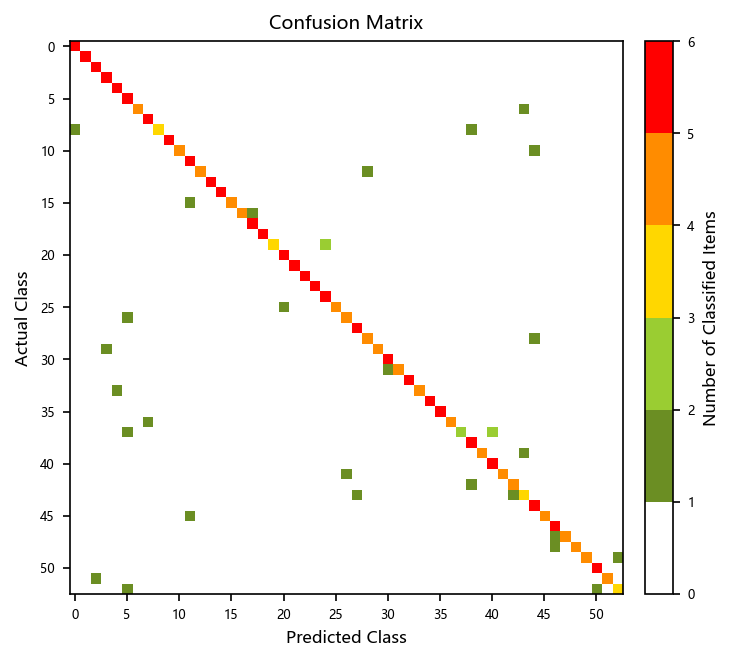

In [151]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, BoundaryNorm

plt.figure(figsize=(5, 5), dpi=150)

colors = ['white', 'olivedrab', 'yellowgreen', 'gold', 'darkorange', 'red']
cmap = ListedColormap(colors)
bounds = np.arange(7)
norm = BoundaryNorm(bounds, 6)

plt.xlabel('Predicted Class', fontsize=8)
plt.ylabel('Actual Class', fontsize=8)
plt.xticks(range(0, 53, 5), fontsize=6)
plt.yticks(range(0, 53, 5), fontsize=6)
plt.title('Confusion Matrix', fontsize=9)

plt.imshow(mat, cmap=cmap)

bar = make_axes_locatable(plt.gca())
cax = bar.append_axes("right", size="5%", pad=0.15)
cl = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
cl.set_label('Number of Classified Items', fontsize=8)
cl.ax.tick_params(labelsize=6)

plt.tight_layout()
plt.savefig('../log_images/confusion.jpg')
plt.show()
